In [ ]:
import sys
sys.path.append('/Users/suying/Desktop/googlenewsNLP/Scripts')
from textclassfier import TextClassifier


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('/clean_data.csv')
dataset

,Title,Category
0,chainlink link falter hedera hbar wobbl yet vc...,Business
1,fund punish nvidia share stun 230 ralli,Business
2,crude oil price stall hedg fund sell kemp,Business
3,grayscal bitcoin win still half battl,Business
4,im home shop editor cantmiss labor day deal im...,Business
...,...,...
51297,slovakia elect could echo ukrain expect,Worldwide
51298,thing know nobel prize washington post,Worldwide
51299,brief calm protest kill 2 student rock imphal,Worldwide
51300,one safe franc vow action bedbug sweep pari,Worldwide


In [3]:
label_encoder = LabelEncoder()
dataset['Category_enc'] = label_encoder.fit_transform(dataset['Category'])
labels = dataset['Category_enc']

In [4]:
labels.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [5]:
dataset['Title'].head()

0    chainlink link falter hedera hbar wobbl yet vc...
1              fund punish nvidia share stun 230 ralli
2            crude oil price stall hedg fund sell kemp
3                grayscal bitcoin win still half battl
4    im home shop editor cantmiss labor day deal im...
Name: Title, dtype: object

In [7]:
# Define hyperparameters
VOCAB_SIZE = 10000
max_sequence_length = 100
embedding_dim = 64
num_classes= 8

from tensorflow.keras.utils import to_categorical
# Convert integer target labels to one-hot encoding
y_one_hot = to_categorical(labels, num_classes)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset['Title'])
sequences = tokenizer.texts_to_sequences(dataset['Title'])
padded_sequences = pad_sequences(sequences, maxlen= max_sequence_length)


# Build the TextCNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense



model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Split the dataset, a typical ratio could be 70-15-15, or adjust as needed
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/5
562/562 [==============================] - 39s 68ms/step - loss: 0.8797 - accuracy: 0.7045 - val_loss: 0.4325 - val_accuracy: 0.8568
Epoch 2/5
562/562 [==============================] - 35s 62ms/step - loss: 0.2710 - accuracy: 0.9075 - val_loss: 0.4058 - val_accuracy: 0.8645
Epoch 3/5
562/562 [==============================] - 32s 57ms/step - loss: 0.1583 - accuracy: 0.9437 - val_loss: 0.4380 - val_accuracy: 0.8572
Epoch 4/5
562/562 [==============================] - 34s 60ms/step - loss: 0.1162 - accuracy: 0.9556 - val_loss: 0.4926 - val_accuracy: 0.8598
Epoch 5/5
241/241 [==============================] - 1s 6ms/step - loss: 0.5309 - accuracy: 0.8583
Validation Loss: 0.5309215188026428, Validation Accuracy: 0.8583495616912842
241/241 [==============================] - 1s 6ms/step - loss: 0.5318 - accuracy: 0.8559
Test Loss: 0.5318335294723511, Test Accuracy: 0.8558991551399231


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           1583488   
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 128)           24704     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 1625736 (6.20 MB)
Trainable params: 1625736 (6.20 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [10]:
# Split the dataset, a typical ratio could be 70-15-15, or adjust as needed
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
562/562 [==============================] - 45s 79ms/step - loss: 0.0863 - accuracy: 0.9625 - val_loss: 0.5532 - val_accuracy: 0.8495
Epoch 2/5
562/562 [==============================] - 35s 62ms/step - loss: 0.0775 - accuracy: 0.9645 - val_loss: 0.5572 - val_accuracy: 0.8508
Epoch 3/5
562/562 [==============================] - 43s 77ms/step - loss: 0.0684 - accuracy: 0.9661 - val_loss: 0.6284 - val_accuracy: 0.8522
Epoch 4/5
562/562 [==============================] - 35s 62ms/step - loss: 0.0635 - accuracy: 0.9673 - val_loss: 0.6494 - val_accuracy: 0.8472
Epoch 5/5
562/562 [==============================] - 36s 64ms/step - loss: 0.0589 - accuracy: 0.9690 - val_loss: 0.7163 - val_accuracy: 0.8473


In [16]:
from sklearn.metrics import classification_report


predictions = model.predict(X_test)


predicted_labels = np.argmax(predictions, axis=1)


report = classification_report(np.argmax(y_test, axis=1), predicted_labels)


print(report)


241/241 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1046
           1       0.88      0.92      0.90      1029
           2       0.67      0.63      0.65      1087
           3       0.88      0.91      0.89       677
           4       0.91      0.90      0.91       657
           5       0.96      0.93      0.94      1192
           6       0.89      0.93      0.91      1006
           7       0.70      0.75      0.72      1002

    accuracy                           0.84      7696
   macro avg       0.85      0.85      0.85      7696
weighted avg       0.84      0.84      0.84      7696



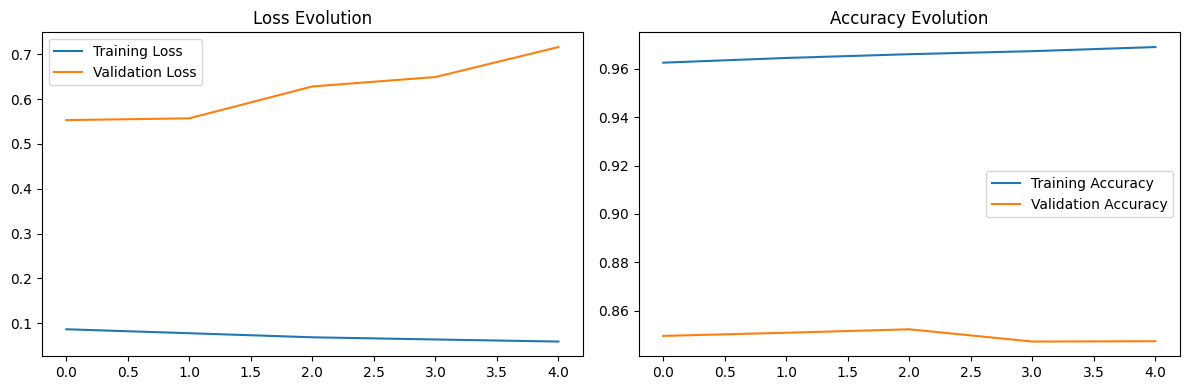

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()

### Observation
It's good. But the general trend is almost same. By looking at these curves, I thought I could add epoch and callback first to see what was going on

### Add more epoch ，implementing a checkpoint to remember the best epoch, and implementing early stopping and LR to avoid overfitting

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/5
561/562 [============================>.] - ETA: 0s - loss: 0.0623 - accuracy: 0.9672
Epoch 1: val_accuracy improved from -inf to 0.84509, saving model to best_model.h5
562/562 [==============================] - 39s 65ms/step - loss: 0.0624 - accuracy: 0.9672 - val_loss: 0.7582 - val_accuracy: 0.8451 - lr: 0.0010
Epoch 2/5
  2/562 [..............................] - ETA: 28s - loss: 0.0494 - accuracy: 0.9609

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


561/562 [============================>.] - ETA: 0s - loss: 0.0535 - accuracy: 0.9693
Epoch 2: val_accuracy did not improve from 0.84509
562/562 [==============================] - 35s 62ms/step - loss: 0.0535 - accuracy: 0.9693 - val_loss: 0.8051 - val_accuracy: 0.8394 - lr: 0.0010
Epoch 3/5
561/562 [============================>.] - ETA: 0s - loss: 0.0506 - accuracy: 0.9698
Epoch 3: val_accuracy did not improve from 0.84509

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
562/562 [==============================] - 36s 64ms/step - loss: 0.0506 - accuracy: 0.9698 - val_loss: 0.8426 - val_accuracy: 0.8425 - lr: 0.0010
Epoch 4/5
561/562 [============================>.] - ETA: 0s - loss: 0.0403 - accuracy: 0.9763
Epoch 4: val_accuracy did not improve from 0.84509
Restoring model weights from the end of the best epoch: 1.
562/562 [==============================] - 36s 63ms/step - loss: 0.0403 - accuracy: 0.9763 - val_loss: 0.9109 - val_accuracy: 0.8437 - lr: 1.00

In this example, we use three different callback functions:

ModelCheckpoint is used to save the best model weights on the validation set.

EarlyStopping Terminate the training early when the verification loss no longer improves.

ReduceLROnPlateau reduces the learning rate when the verification loss no longer improves.

These callback functions will monitor the performance of the validation set during model training and operate according to some preset conditions. You can adjust the parameters of the callback function according to your needs, such as patience (patientness, that is, how many epochs stop training after not improving), factor (factor of learning rate attenuation), mode (monitoring mode, such as maximization and minimization), etc.

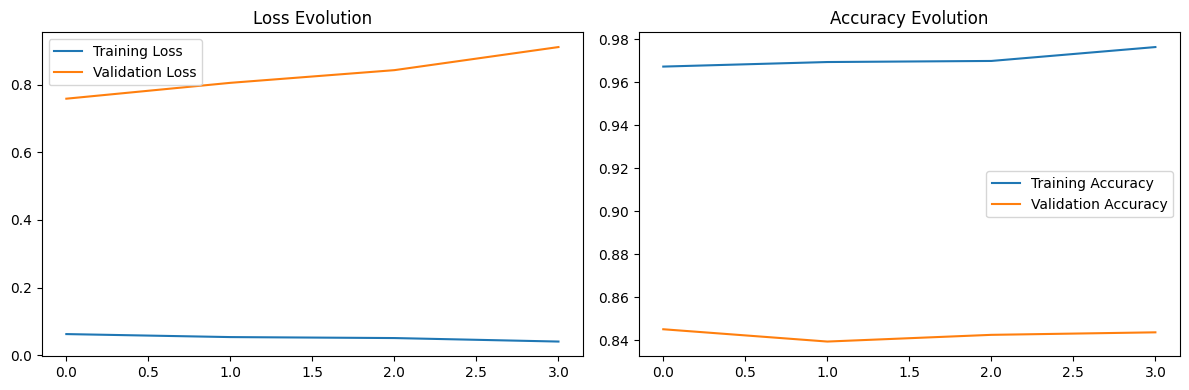

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()

So from the graph right,we can see the model is better. train accuracy and validation acccurcy are growing. SO Let's countinue add more epoches!

In [19]:

history = model.fit(X_train, y_train, epochs=30, batch_size=64,
                    validation_data=(X_val, y_val), initial_epoch=len(history.history['loss']),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 5/30
561/562 [============================>.] - ETA: 0s - loss: 0.0432 - accuracy: 0.9746
Epoch 5: val_accuracy improved from 0.84509 to 0.84548, saving model to best_model.h5
562/562 [==============================] - 37s 65ms/step - loss: 0.0432 - accuracy: 0.9746 - val_loss: 0.8221 - val_accuracy: 0.8455 - lr: 1.0000e-04
Epoch 6/30
561/562 [============================>.] - ETA: 0s - loss: 0.0404 - accuracy: 0.9750
Epoch 6: val_accuracy improved from 0.84548 to 0.84600, saving model to best_model.h5
562/562 [==============================] - 37s 65ms/step - loss: 0.0404 - accuracy: 0.9750 - val_loss: 0.8503 - val_accuracy: 0.8460 - lr: 1.0000e-04
Epoch 7/30
561/562 [============================>.] - ETA: 0s - loss: 0.0391 - accuracy: 0.9748
Epoch 7: val_accuracy did not improve from 0.84600

Epoch 7: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
562/562 [==============================] - 35s 62ms/step - loss: 0.0391 - accuracy: 0.9748 - val_loss: 0.8649 -

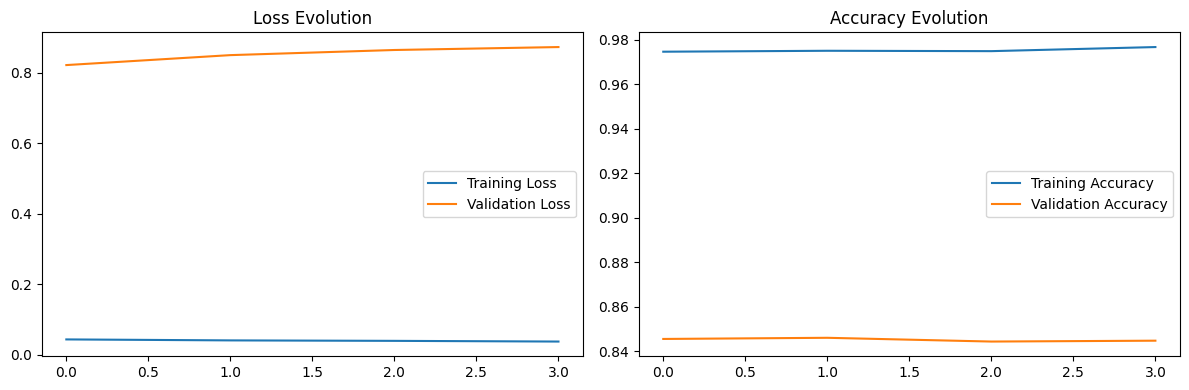

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()

SO THIS Model can not get better, accuracy is around 85%.

### Let's Try LSTM AND Droupout!!!

In [21]:
from tensorflow.keras.layers import LSTM, Dropout



model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model_rnn.add(LSTM(64, return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(LSTM(32))
model_rnn.add(Dense(num_classes, activation='softmax'))

model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history_rnn = model_rnn.fit(X_train, y_train, epochs=20, batch_size=64,
                            validation_data=(X_val, y_val),
                            callbacks=[checkpoint, early_stopping, lr_scheduler])


test_loss_rnn, test_accuracy_rnn = model_rnn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_rnn}, Test Accuracy: {test_accuracy_rnn}")

Epoch 1/20
562/562 [==============================] - ETA: 0s - loss: 0.9598 - accuracy: 0.6669
Epoch 1: val_accuracy did not improve from 0.84600
562/562 [==============================] - 159s 266ms/step - loss: 0.9598 - accuracy: 0.6669 - val_loss: 0.5063 - val_accuracy: 0.8416 - lr: 0.0010
Epoch 2/20
562/562 [==============================] - ETA: 0s - loss: 0.3292 - accuracy: 0.8965
Epoch 2: val_accuracy improved from 0.84600 to 0.86017, saving model to best_model.h5
562/562 [==============================] - 120s 213ms/step - loss: 0.3292 - accuracy: 0.8965 - val_loss: 0.4359 - val_accuracy: 0.8602 - lr: 0.0010
Epoch 3/20
562/562 [==============================] - ETA: 0s - loss: 0.2127 - accuracy: 0.9302
Epoch 3: val_accuracy improved from 0.86017 to 0.86030, saving model to best_model.h5
562/562 [==============================] - 119s 211ms/step - loss: 0.2127 - accuracy: 0.9302 - val_loss: 0.4604 - val_accuracy: 0.8603 - lr: 0.0010
Epoch 4/20
562/562 [=========================

In [29]:
model_rnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           1583488   
                                                                 
 lstm_2 (LSTM)               (None, 100, 64)           33024     
                                                                 
 activation (Activation)     (None, 100, 64)           0         
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                

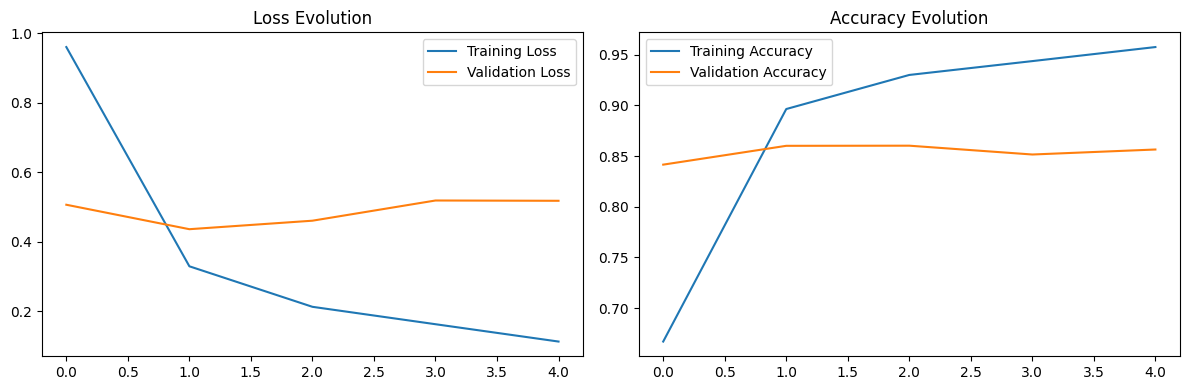

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()

For Sure, This Model RNN(LSTM)+Dropout is better than before. So now Let's add some active functions.

In [24]:
from tensorflow.keras.layers import Activation

model_rnn2 = Sequential()
model_rnn2.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model_rnn2.add(LSTM(64, return_sequences=True))
model_rnn2.add(Activation('relu'))
model_rnn2.add(Dropout(0.15))
model_rnn2.add(LSTM(32))
model_rnn2.add(Activation('relu'))
model_rnn2.add(Dense(num_classes, activation='softmax'))

model_rnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_rnn2 = model_rnn2.fit(X_train, y_train, epochs=20, batch_size=64,
                            validation_data=(X_val, y_val),
                            callbacks=[checkpoint, early_stopping, lr_scheduler])


test_loss_rnn, test_accuracy_rnn = model_rnn2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_rnn}, Test Accuracy: {test_accuracy_rnn}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()

Epoch 1/20
562/562 [==============================] - ETA: 0s - loss: 1.1324 - accuracy: 0.6071
Epoch 1: val_accuracy did not improve from 0.86030
562/562 [==============================] - 129s 219ms/step - loss: 1.1324 - accuracy: 0.6071 - val_loss: 0.6068 - val_accuracy: 0.8207 - lr: 0.0010
Epoch 2/20
562/562 [==============================] - ETA: 0s - loss: 0.4218 - accuracy: 0.8735
Epoch 2: val_accuracy did not improve from 0.86030
562/562 [==============================] - 118s 210ms/step - loss: 0.4218 - accuracy: 0.8735 - val_loss: 0.4820 - val_accuracy: 0.8464 - lr: 0.0010
Epoch 3/20
562/562 [==============================] - ETA: 0s - loss: 0.2753 - accuracy: 0.9158
Epoch 3: val_accuracy did not improve from 0.86030
562/562 [==============================] - 116s 207ms/step - loss: 0.2753 - accuracy: 0.9158 - val_loss: 0.4702 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 4/20
562/562 [==============================] - ETA: 0s - loss: 0.2158 - accuracy: 0.9326
Epoch 4: val_accura

RuntimeError: ignored

241/241 [==============================] - 9s 37ms/step - loss: 0.4743 - accuracy: 0.8485
Test Loss: 0.47426652908325195, Test Accuracy: 0.8484927415847778


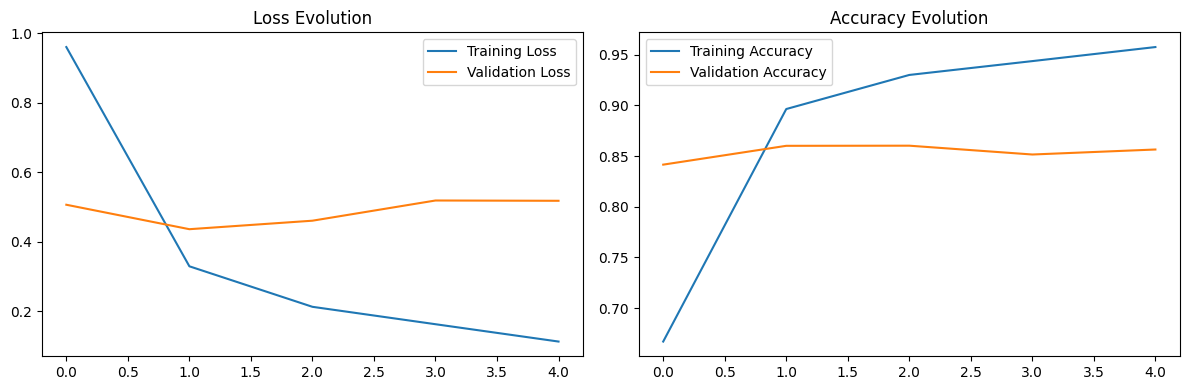

In [25]:
test_loss_rnn, test_accuracy_rnn = model_rnn2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_rnn}, Test Accuracy: {test_accuracy_rnn}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()

In [28]:
model_rnn2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           1583488   
                                                                 
 lstm_4 (LSTM)               (None, 100, 64)           33024     
                                                                 
 activation_2 (Activation)   (None, 100, 64)           0         
                                                                 
 dropout_2 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                

Doesn't changed too munch.

### Conclusion:
WE can find the ploblem from the beginning. In the part Baseline_Model,we have got the best result like 85%, and it can not be imported. This reasion why is that there are two labels always confused ( headline and worldwde)